Classifying handwritten digits

In [2]:

from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let’s look at the training data:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

 And here’s the test data:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

The network architecture

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The compilation step

In [10]:
network.compile(optimizer='rmsprop',
   loss='categorical_crossentropy',
   metrics=['accuracy'])

 Before training, we’ll preprocess the data by reshaping it into the shape the network
 expects and scaling it so that all values are in the [0, 1] interval. Previously, our train
ing images, for instance, were stored in an array of shape (60000, 28, 28) of type
 uint8 with values in the [0, 255] interval. We transform it into a float32 array of
 shape (60000, 28 * 28) with values between 0 and 1.

 Preparing the image data

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels

 Preparing the labels

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We’re now ready to train the network, which in Keras is done via a call to the net
work’s fit method—we fit the model to its training data:

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8695 - loss: 0.4492
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9658 - loss: 0.1179
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9794 - loss: 0.0727
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0383


Two quantities are displayed during training: the loss of the network over the training
 data, and the accuracy of the network over the training data.
 We quickly reach an accuracy of 0.989 (98.9%) on the training data. Now let’s
 check that the model performs well on the test set, too:

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0686
test_acc: 0.9818000197410583


 The test-set accuracy turns out to be 98.1% —that’s quite a bit lower than the training
 set accuracy. This gap between training accuracy and test accuracy is an example of
 overfitting: the fact that machine-learning models tend to perform worse on new data
 than on their training data.

Displaying the image of a tensor

In [19]:
digit = train_images[4]
digit_reshaped_grayscale = digit.reshape(28, 28)

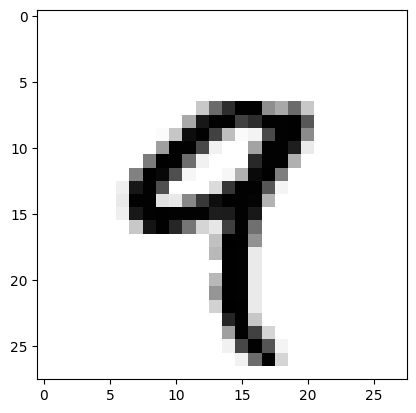

In [20]:
import matplotlib.pyplot as plt
plt.imshow(digit_reshaped_grayscale, cmap=plt.cm.binary)
plt.show()